In [1]:
# import thư viện numpy
import numpy as np
# import thư viện matplotlib
import matplotlib.pyplot as plt
import scipy.sparse as sp


# Tải dữ liệu data X và y đã được xử lý thành ma trận
labels = np.load('D:/Document/Machine_Learning/CS3/label.npy') 
features = sp.load_npz('D:/Document/Machine_Learning/CS3/tfidf.npz')

def add_bias(features, labels):
    '''
    features là ma trận N*X với N là số datapoint, X là số term trong dictionary
    labels là ma trận N*1 với N là số datapoint
    
    Hàm trả về ma trận features(sau khi đã thêm 1 cột bias giá trị 1 cho tất cả các phần tử) và labels
    '''
    # Thêm cột giá trị bias cho dữ liệu
    labels_final = sp.csr_matrix(labels, shape = (1, len(labels)))
    matrix_ones = sp.csc_matrix((26709,1),dtype=np.float)
    matrix_ones[:]=1
    matrix_final_features= sp.csc_matrix(sp.hstack((features,matrix_ones)))
    return matrix_final_features, labels_final

# chia Train và test
matrix_final_features, labels_final = add_bias(features, labels)
X_Train = matrix_final_features[:20000]
X_test = matrix_final_features[20000:]
y_Train = labels_final.T[:20000]
y_test = labels_final.T[20000:]

D:\Anaconda3\envs\Nguyen\lib\site-packages\scipy\sparse\compressed.py:746: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


# Hàm Sigmoid

In [3]:
def sigmoid(z):
    # hàm sigmoid
    '''
    z là model đầu ra Linear Regression
    np.exp là e mũ
    Hàm trả về sigmoid của z
    
    '''
    return 1/(1+np.exp(-z))

# Hàm Cost Function

In [4]:
def Cost_Function(w, y, X):
    '''
    w là ma trận bộ tham số có shape bằng shape X
    X là features
    y là y labels
    Hàm trả về cost tương ứng bộ tham số w
    
    '''
    # tính giá trị đầu ra của hàm Linear Regression
    s = X.dot(w).toarray()
    # scale s về khoảng [0,1] dùng hàm sigmoid
    # z là xác xuất điểm dữ liệu rơi vào lớp y
    z = sigmoid(s)
    y = y.toarray()
    
    cost = -np.sum((y*(np.log(z)) + (1-y)*np.log(1-z)))
    
    return cost

# Hàm tính đạo hàm 

In [5]:
def Derivative(w, y, X):
    '''
    W là ma trận bộ trọng số w: (28901, 1)  <class 'scipy.sparse.csc.csc_matrix'>
    y là dữ liệu labels y: (1, 1) <class 'scipy.sparse.csc.csc_matrix'>
    X là dữ liệu Train X: (28901, 1) <class 'scipy.sparse.csr.csr_matrix'>
    
    Hàm trả về giá trị đạo hàm cho từng feature
    '''
    # tính giá trị đầu ra của hàm Linear Regression
    s = X.dot(w).toarray()
    # scale s về khoảng [0,1] dùng hàm sigmoid
    # z là xác xuất điểm dữ liệu rơi vào lớp y
    z = sigmoid(s)
    y = y.toarray()
#     print('z',z.shape, type(z))
#     print('y',y.shape, type(y))
#     print('X',X.shape, type(X))
    der = (z-y).T
    
    X = X.T
#     print(X.shape, type(X))
    der = sp.csr_matrix(der, shape = (1,der.shape[1]))
    der = der.T
#     print(der.shape, type(der))
    
    return X.dot(der)

# Khởi tạo bộ tham số w

In [6]:

# Khởi tạo ma trận biến với giá trị khởi tạo tại mỗi phần tử là 0
w = np.zeros((X_Train.shape[1], 1))
w = sp.csc_matrix(w, shape = (len(w),1))
# Khởi tạo learning rate

# Khởi tạo Learning Rate

In [13]:
alpha = 0.01

# BGD Gradient Descent

epoch =  0 cost =  15813.703380217154
epoch =  500 cost =  35632.65201465675
epoch =  1000 cost =  20765.786554918865
epoch =  1500 cost =  12643.515665670413
epoch =  2000 cost =  8105.07157649964
epoch =  2500 cost =  5715.66388508833
epoch =  3000 cost =  4424.900101229603
epoch =  3500 cost =  3940.1693667444724
epoch =  4000 cost =  3702.6997710589985
epoch =  4500 cost =  3503.0414224153146
epoch =  5000 cost =  3329.401375017695
epoch =  5500 cost =  3175.4044211598984
epoch =  6000 cost =  3037.0757409764806
epoch =  6500 cost =  2911.690090577124
epoch =  7000 cost =  2797.2492276155676
epoch =  7500 cost =  2692.2174065198215
epoch =  8000 cost =  2595.3742006572847
epoch =  8500 cost =  2505.7258325960174
epoch =  9000 cost =  2422.44814135111
epoch =  9500 cost =  2344.8478853315737


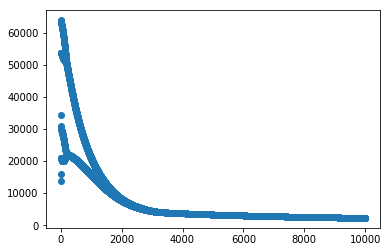

In [105]:
# list chứa tất cả mse
all_Cost = []

# Khởi tạo số vòng lặp
num = 10000
# Huấn luyện
for i in range(num):
    # Tính cost với w hiện thời
    err = Cost_Function(w, y_Train, X_Train)
    all_Cost.append(err)
    # Cập nhật w theo công thức gradient descent
    der = Derivative(w, y_Train, X_Train)
    w = w - alpha*der 
    
    if i % 500 == 0:
        # In ra cost tại vòng lặp thứ i
        print("epoch = ", i, "cost = ",Cost_Function(w, y_Train, X_Train))
    
   


        
# Vẽ đồ thị biễu diễn cost qua từng vòng lặp
axis_x = list(range(num))
axis_y = all_Cost
plt.scatter(axis_x, axis_y)
plt.show()

In [ ]:
# Lưu bộ tham số xuống file npz
sp.save_npz('D:/Document/Machine_Learning/CS3/w.npz', w)

In [11]:
# kiểm tra trên tập test
print("Cost trên tập test_data:", Cost_Function(w, y_test, X_test))

Cost trên tập test_data: 3111.0340342201334


# SGD Gradient Descent

In [ ]:
all_Cost = []

num = 40

for i in range(num):
    err = Cost_Function(w, y_Train, X_Train)
    all_Cost.append(err)
    

    print("epoch:", i,'Cost = ', err)
    
    for j in range(X_Train.shape[0]):
        der = Derivative(w, y_Train[j], X_Train[j])
        w = w - alpha*der  

print("epoch:", i,'Cost = ', Cost_Function(w, y_Train, X_Train))
axis_x = list(range(num))
axis_y = all_Cost
plt.scatter(axis_x, axis_y)
plt.show()

epoch: 0 Cost =  1927.2002761677895
epoch: 1 Cost =  1927.1660930778567
epoch: 2 Cost =  1926.1737421827752
epoch: 3 Cost =  1925.1824589409362
epoch: 4 Cost =  1924.1922445469381
epoch: 5 Cost =  1923.2030971189834
epoch: 6 Cost =  1922.2150147819164
epoch: 7 Cost =  1921.227995667151
